### Data Preprocessing:


In [319]:
# Import 
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [320]:
# Load the dataset
df = pd.read_csv('tai.csv')
df

,label,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x29,y29,x30,y30,x31,y31,x32,y32,x33,y33
0,Tame,259,120,267,108,271,108,275,108,251,...,123,595,489,597,126,606,522,610,109,626
1,Bow-Arrow,207,82,210,78,211,78,213,78,209,...,177,242,281,246,184,251,273,254,159,253
2,Bow-Arrow,233,85,241,73,246,72,251,71,230,...,133,501,499,505,147,520,478,520,82,526
3,Bow-Arrow,352,124,346,114,345,114,344,114,346,...,116,409,391,409,101,411,454,406,123,433
4,Bow-Arrow,174,179,181,165,184,165,187,165,179,...,89,636,643,662,111,673,640,691,32,668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Sitting,593,347,596,327,600,325,604,323,592,...,751,634,646,564,758,614,611,592,791,674
57,Sitting,304,119,302,99,302,99,302,99,294,...,352,546,88,521,346,575,106,574,457,587
58,Sitting,277,83,284,64,287,63,290,62,282,...,531,527,256,578,548,498,160,589,554,589
59,Taijiquan,389,116,398,100,402,100,408,101,381,...,272,680,461,680,277,691,479,731,267,735


In [321]:
# Check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 67 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   61 non-null     object
 1   x1      61 non-null     int64 
 2   y1      61 non-null     int64 
 3   x2      61 non-null     int64 
 4   y2      61 non-null     int64 
 5   x3      61 non-null     int64 
 6   y3      61 non-null     int64 
 7   x4      61 non-null     int64 
 8   y4      61 non-null     int64 
 9   x5      61 non-null     int64 
 10  y5      61 non-null     int64 
 11  x6      61 non-null     int64 
 12  y6      61 non-null     int64 
 13  x7      61 non-null     int64 
 14  y7      61 non-null     int64 
 15  x8      61 non-null     int64 
 16  y8      61 non-null     int64 
 17  x9      61 non-null     int64 
 18  y9      61 non-null     int64 
 19  x10     61 non-null     int64 
 20  y10     61 non-null     int64 
 21  x11     61 non-null     int64 
 22  y11     61 non-null     int6

In [322]:
# Remove missing values
df.dropna(inplace=True)

In [323]:
# Check the null values
df.isnull().sum()

label    0
x1       0
y1       0
x2       0
y2       0
        ..
y31      0
x32      0
y32      0
x33      0
y33      0
Length: 67, dtype: int64

### Calculate Angle Keypoints

In [324]:
import numpy as np
import math

def get_angle(frame, keypoint_1, keypoint_2, keypoint_3, keypoint_4):
    a = np.array([frame['x' + str(keypoint_1)], frame['y' + str(keypoint_1)]])
    b = np.array([frame['x' + str(keypoint_2)], frame['y' + str(keypoint_2)]]) 
    c = np.array([frame['x' + str(keypoint_3)], frame['y' + str(keypoint_3)]]) 
    d = np.array([frame['x' + str(keypoint_4)], frame['y' + str(keypoint_4)]]) 

    ba = a - b
    bc = c - b
    cd = d - c
    
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = math.degrees(np.arccos(cosine_angle))
    
    if angle > 180.0:
        angle = 360 - angle
        
    return angle


In [325]:
df['angle'] = df.apply(lambda row: get_angle(row, 11, 13, 23, 24), axis=1)


In [326]:
df

,label,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,y29,x30,y30,x31,y31,x32,y32,x33,y33,angle
0,Tame,259,120,267,108,271,108,275,108,251,...,595,489,597,126,606,522,610,109,626,141.901751
1,Bow-Arrow,207,82,210,78,211,78,213,78,209,...,242,281,246,184,251,273,254,159,253,173.190950
2,Bow-Arrow,233,85,241,73,246,72,251,71,230,...,501,499,505,147,520,478,520,82,526,163.886582
3,Bow-Arrow,352,124,346,114,345,114,344,114,346,...,409,391,409,101,411,454,406,123,433,41.916548
4,Bow-Arrow,174,179,181,165,184,165,187,165,179,...,636,643,662,111,673,640,691,32,668,141.504615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Sitting,593,347,596,327,600,325,604,323,592,...,634,646,564,758,614,611,592,791,674,77.866957
57,Sitting,304,119,302,99,302,99,302,99,294,...,546,88,521,346,575,106,574,457,587,107.826621
58,Sitting,277,83,284,64,287,63,290,62,282,...,527,256,578,548,498,160,589,554,589,64.091214
59,Taijiquan,389,116,398,100,402,100,408,101,381,...,680,461,680,277,691,479,731,267,735,131.893973


In [327]:
# Save the dataset to a CSV file
df.to_csv('taijiquan_dataset.csv', index=False)

In [328]:
dataset = pd.read_csv('taijiquan_dataset.csv')
dataset

,label,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,y29,x30,y30,x31,y31,x32,y32,x33,y33,angle
0,Tame,259,120,267,108,271,108,275,108,251,...,595,489,597,126,606,522,610,109,626,141.901751
1,Bow-Arrow,207,82,210,78,211,78,213,78,209,...,242,281,246,184,251,273,254,159,253,173.190950
2,Bow-Arrow,233,85,241,73,246,72,251,71,230,...,501,499,505,147,520,478,520,82,526,163.886582
3,Bow-Arrow,352,124,346,114,345,114,344,114,346,...,409,391,409,101,411,454,406,123,433,41.916548
4,Bow-Arrow,174,179,181,165,184,165,187,165,179,...,636,643,662,111,673,640,691,32,668,141.504615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Sitting,593,347,596,327,600,325,604,323,592,...,634,646,564,758,614,611,592,791,674,77.866957
57,Sitting,304,119,302,99,302,99,302,99,294,...,546,88,521,346,575,106,574,457,587,107.826621
58,Sitting,277,83,284,64,287,63,290,62,282,...,527,256,578,548,498,160,589,554,589,64.091214
59,Taijiquan,389,116,398,100,402,100,408,101,381,...,680,461,680,277,691,479,731,267,735,131.893973


In [329]:
# Check if there are any missing values in the dataset
missing_values = dataset.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 label    0
x1       0
y1       0
x2       0
y2       0
        ..
x32      0
y32      0
x33      0
y33      0
angle    0
Length: 68, dtype: int64


In [330]:
# Remove rows with missing values
dataset.dropna(inplace=True)

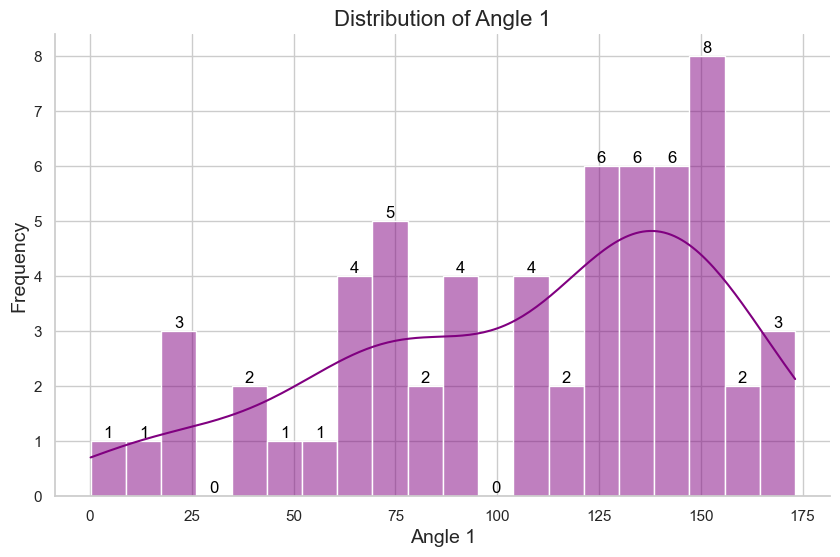

In [331]:
# Creating a histogram
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the histogram
sns.histplot(df['angle'], bins=20, kde=True, color='purple')

plt.xlabel('Angle 1', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Angle 1', fontsize=16)

# Annotate each bin with the number of data points
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}',
                ha='center', va='bottom', fontsize=12, color='black')

# Customize the style
sns.set_style("whitegrid")  # Use a white grid background
sns.despine()

# Show the plot
plt.show()


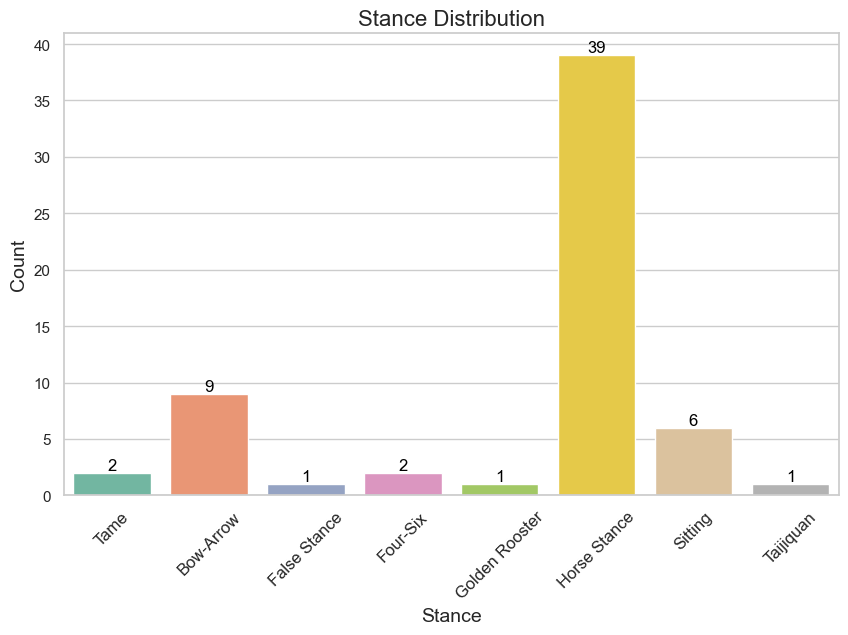

In [332]:
# Creating a bar chart with Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size

# Use Seaborn's countplot with hue to specify x and legend=False
sns.set(style="whitegrid")  # Use a white grid background
ax = sns.countplot(x="label", hue="label", data=df, palette="Set2", legend=False)

plt.xlabel('Stance', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Stance Distribution', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

# Show the plot
plt.show()

In [333]:
# Split the dataset into features (angles) and labels (stances)

features = dataset.drop(columns=['label'])
labels = dataset['label']


In [334]:
# Encode the labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)


### Data Splitting:


In [335]:
dataset['label'].unique()

array(['Tame', 'Bow-Arrow', 'False Stance', 'Four-Six', 'Golden Rooster',
       'Horse Stance', 'Sitting', 'Taijiquan'], dtype=object)

In [336]:

X_train, X_temp, y_train_encoded, y_temp = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)
X_val, X_test, y_val_encoded, y_test_encoded = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [337]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [338]:
# Number of classes (replace with the actual number of classes)
num_classes = len(label_encoder.classes_)
print(num_classes)

8


# FNN model using Keras

In [339]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(128, activation='relu'))  # Additional hidden layer
model.add(Dense(64, activation='relu'))   # Another hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [340]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [341]:
# One-hot encode the labels
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val_encoded, num_classes=num_classes)

In [342]:
# Train the model
history = model.fit(X_train_scaled, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val_one_hot))

Epoch 1/10
2/2 [==============================] - 2s 492ms/step - loss: 2.0589 - accuracy: 0.1458 - val_loss: 1.9310 - val_accuracy: 0.1667
Epoch 2/10
2/2 [==============================] - 0s 48ms/step - loss: 1.8069 - accuracy: 0.2292 - val_loss: 1.7389 - val_accuracy: 0.6667
Epoch 3/10
2/2 [==============================] - 0s 48ms/step - loss: 1.5982 - accuracy: 0.6458 - val_loss: 1.5720 - val_accuracy: 0.6667
Epoch 4/10
2/2 [==============================] - 0s 48ms/step - loss: 1.4268 - accuracy: 0.7292 - val_loss: 1.4397 - val_accuracy: 0.8333
Epoch 5/10
2/2 [==============================] - 0s 51ms/step - loss: 1.2896 - accuracy: 0.7292 - val_loss: 1.3248 - val_accuracy: 0.8333
Epoch 6/10
2/2 [==============================] - 0s 55ms/step - loss: 1.1703 - accuracy: 0.7083 - val_loss: 1.2251 - val_accuracy: 0.8333
Epoch 7/10
2/2 [==============================] - 0s 48ms/step - loss: 1.0752 - accuracy: 0.6875 - val_loss: 1.1631 - val_accuracy: 0.8333
Epoch 8/10
2/2 [==========

In [343]:
# Evaluate the model on the test set
X_test_scaled = scaler.transform(X_test)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_one_hot)

print(f'Test accuracy: {test_accuracy * 100:.2f}%')

1/1 [==============================] - 0s 40ms/step - loss: 2.0338 - accuracy: 0.2857
Test accuracy: 28.57%


1/1 [==============================] - 0s 157ms/step
Confusion Matrix:
[[0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 2 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      1.00         1
           2       1.00      0.00      0.00         1
           4       0.33      1.00      0.50         2
           5       1.00      0.00      0.00         1
           6       1.00      0.00      0.00         1
           7       1.00      0.00      0.00         1

    accuracy                           0.29         7
   macro avg       0.72      0.17      0.25         7
weighted avg       0.67      0.29      0.29         7



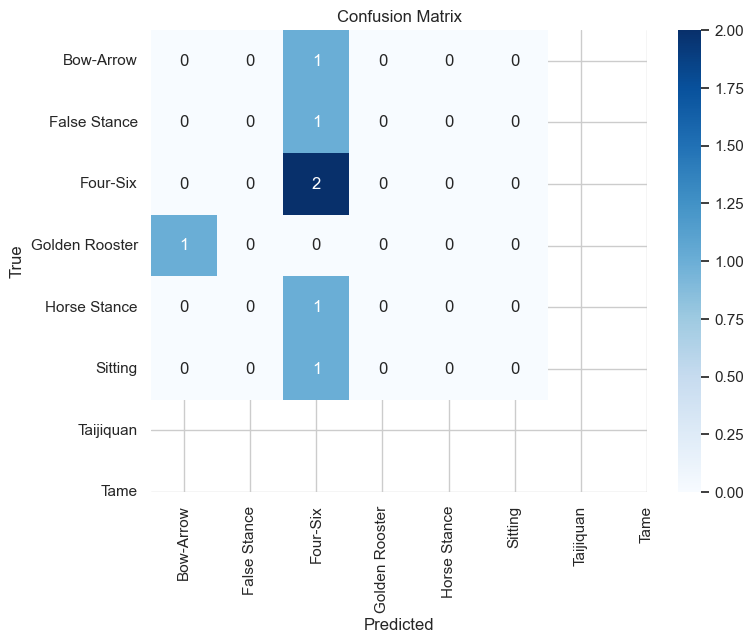

In [344]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you've already evaluated your model as shown in your code

# Generate predictions on the test set
y_pred = model.predict(X_test_scaled)

# Convert one-hot encoded predictions and true labels back to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print the classification report
class_report = classification_report(y_true_labels, y_pred_labels, zero_division=1)  # Use zero_division=1
print("Classification Report:")
print(class_report)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
